# KAGRA PRMI

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.1.331         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
base = finesse.kat()
base.verbose=False
base.parse("""
# clight 299792458.0 

l i1 83.74 0  nL                  #I0=780W
const fmod1 16.880962M            #f1
const fmod2 45.0159M              #f2
const fmod3 56.2699M              #f3

mod eo1 $fmod1 0.1 1 pm 0 nL neo1
s seo1 0 neo1 neo2
mod eo2 $fmod2 0.1 1 pm 0 neo2 neo3
s seo2 0 neo3 neo4
mod eo3 $fmod3 0.05 1 am 0 neo4 neo5

s eo1refl 0 neo5 neo22
bs refl 0.0001 0.9999 0 45 neo22 dump npr nREFL   #REFL
s bsm 0 npr nprb
m prm 0.90 0.10 90 nprb nf0
s Lp1 14.7615 nf0 nf1 #14.7615 
bs PR2 1 0 0 0.6860 nf1 nf2 dump dump # tilted
s Lp2 11.0661 nf2 nf3
bs PR3 1 0 0 0.6860 nf3 nf4 dump dump # tilted
s Lp3 15.7638 nf4 n1

bs bs1 0.5 0.5 0 45 n1 n2 n3hr n4hr   #BS
s bs1bsAR1 0 n3hr n3hr2
m bsAR1 0 1 0 n3hr2 n3ar
s subBS1 0.0 1.45 n3ar n3ar2 # BS thickness is ignored 
m bsAR3 0 1 0 n3ar2 n3
s bs1bsAR2 0 n4hr n4hr2
m bsAR2 0 1 0 n4hr2 n4ar
s subBS2 0.0 1.45 n4ar n4ar2 # BS thickness is ignored 
m bsAR4 0 1 0 n4ar2 n4

s Lmx 26.6649  n3 n6
s Lmy 23.3351  n2 n5

bs ARx 200e-6 0.9998 0 0.025 n6 nPOX n6ar dump   #wedged ITM
bs ARy 200e-6 0.9998 0 0.025 n5 dump n5ar dump   #wedged ITM

s subx 0.0 1.754 n6ar n6hr # ITM thickness is ignored
s suby 0.0 1.754 n5ar n5hr # ITM thickness is ignored

m ITMx 0.996 4000e-6 90 n6hr dump
m ITMy 0.996 4000e-6 0 n5hr dump

attr ITMx Rc -1900 % no error
attr ITMy Rc -1900 % no error
attr ARx Rc 0
attr ARy Rc 0
attr prm Rc -458.1285
attr PR2 Rc -3.0764
attr PR3 Rc 24.9165

phase 2

""")

## Field Checks

### Fields in PRC

<function matplotlib.pyplot.show>

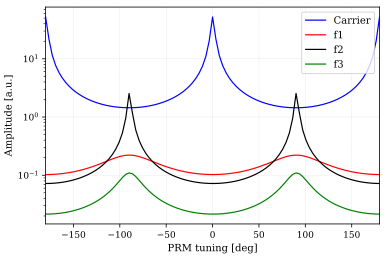

In [3]:
kat0 = base.deepcopy()
kat0.parse("""
ad CRPRC 0 nf0
ad f1PRC 16.880962M nf0
ad f2PRC 45.0159M   nf0
ad f3PRC 56.2699M   nf0
xaxis* prm phi lin -180 180 100

cav prcN prm nf0 ITMx n6hr
cav prcS prm nf0 ITMy n5hr
""")

out = kat0.run()
plt.semilogy(out.x, out["CRPRC"],label="Carrier")
plt.semilogy(out.x, out["f1PRC"],label="f1")
plt.semilogy(out.x, out["f2PRC"],label="f2")
plt.semilogy(out.x, out["f3PRC"],label="f3")
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Amplitude [a.u.]")
plt.legend(loc=0)
plt.show

### Gouy Phase in PRC

[16.50206843 16.50206843]


<function matplotlib.pyplot.show>

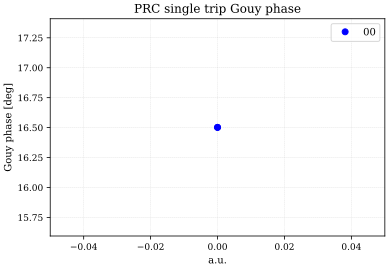

In [4]:
base.phase=0
kat0 = base.deepcopy()
kat0.parse("""
gouy gd x Lp1 Lp2 Lp3
xaxis* Lp3 l lin 0 0 1
cav prcN prm nf0 ITMx n6hr
cav prcS prm nf0 ITMy n5hr
""")


out = kat0.run()
print(out["gd"])
plt.plot(out.x, out["gd"],'o',label="00")
plt.xlabel("a.u.")
plt.ylabel("Gouy phase [deg]")
plt.title("PRC single trip Gouy phase")
plt.legend(loc=0)
plt.show

## HOM in ideal PRC
### No HOM! MAXTEM 8

<function matplotlib.pyplot.show>

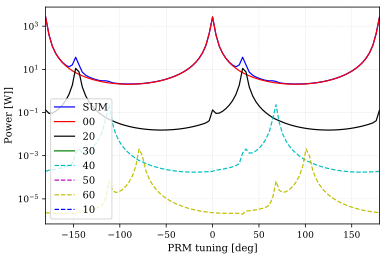

In [5]:
kat0 = base.deepcopy()
kat0.parse("""
ad CRPRC 0 0 0 nf0
ad ad1 1 0 0 nf0
ad ad2 2 0 0 nf0
ad ad3 0 3 0 nf0
ad ad4 4 0 0 nf0
ad ad5 5 0 0 nf0
ad ad6 6 0 0 nf0
ad all 0 nf0
xaxis* prm phi lin -180 180 100
gauss input i1 nL 4.4088792e-3 7.3067531
cav prcN prm nf0 ITMx n6hr
#cav prcS prm nf0 ITMy n5hr
phase 2
maxtem 6
""")

out = kat0.run()
plt.semilogy(out.x, (out["all"])**2,label="SUM")
plt.semilogy(out.x, (out["CRPRC"])**2,label="00")
plt.semilogy(out.x, (out["ad2"])**2,label="20")
plt.semilogy(out.x, (out["ad3"])**2,label="30")
plt.semilogy(out.x, (out["ad4"])**2,'--',label="40")
plt.semilogy(out.x, (out["ad5"])**2,'--',label="50")
plt.semilogy(out.x, (out["ad6"])**2,'--',label="60")
plt.semilogy(out.x, (out["ad1"])**2,'--',label="10")
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Power [W]]")
plt.legend(loc=0)
plt.show


In [6]:
kat0.parse("""
beam idealbeam nREFL
gauss input i1 nL 4.4088792e-3 7.3067531
xaxis idealbeam x lin -2 2 300
x2axis idealbeam y lin -2 2 300
maxtem 6
phase 2
""")

beamprof = kat0.run()

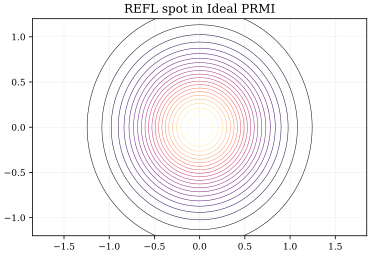

In [7]:
fig = plt.figure()
fig = plt.contour(beamprof.x, beamprof.y, beamprof["idealbeam"], 25, linewidths=0.5)
plt.axis("equal")
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.title('REFL spot in Ideal PRMI')

plt.show()

## HOM in Realistic PRC
### RoC error of 0.１% for test masses and PRM, 0.5% for other mirrors, No PRM mirror map, Mirror Tilt offset of 1% (but No ITM thickness or No length errors)

In [8]:
kat0 = base.deepcopy()

kat0.prm.remove()
kat0.PR2.remove()
kat0.PR3.remove()
kat0.bs1.remove()
kat0.ITMx.remove()
kat0.ITMy.remove()

In [9]:
#### -0.1% Error on PRM
kat0.parse("""
m prm 0.90 0.10 90 nprb nf0
bs PR2 1 0 0 0.6861132 nf1 nf2 dump dump      # tilted+0.1%error
bs PR3 1 0 0 0.687486799 nf3 nf4 dump dump    # tilted-0.1%error
bs bs1 0.5 0.5 0 45 n1 n2 n3hr n4hr   #BS
m ITMx 0.996 4000e-6 90 n6hr dump
m ITMy 0.996 4000e-6 0 n5hr dump
attr ITMx Rc -1901.9 % off +0.1%
attr ITMy Rc -1901.9 % off +0.1%
attr ARx Rc 0
attr ARy Rc 0
attr prm Rc -458.5866  #-458.1285
attr PR2 Rc -3.0794764 #-3.0764
attr PR3 Rc 24.8915 #-0.1%

##### Original RoCs #####
#attr prm Rc -458.1285
#attr PR2 Rc -3.0764
#attr PR3 Rc 24.9165

ad CRPRC 0 0 0 nf0
ad ad1 1 0 0 nf0
ad ad2 2 0 0 nf0
ad ad3 0 3 0 nf0
ad ad4 4 0 0 nf0
ad ad5 5 0 0 nf0
ad ad6 6 0 0 nf0
ad all 0 nf0
xaxis prm phi lin -180 180 100
gauss input i1 nL 4.4088792e-3 7.3067531
maxtem 6
phase 2
""")

out = kat0.run()

###### +0.1% error on PRM
kat0.prm.remove()
kat0.parse("""
m prm 0.90 0.10 120 nprb nf0
attr PR3 Rc 24.9414165  #+0.1%
ad CRPRC 0 0 0 nf0
ad ad1 1 0 0 nf0
ad ad2 2 0 0 nf0
ad ad3 0 3 0 nf0
ad ad4 4 0 0 nf0
ad ad5 5 0 0 nf0
ad ad6 6 0 0 nf0
ad all 0 nf0
xaxis prm phi lin -180 180 100
gauss input i1 nL 4.4088792e-3 7.3067531
maxtem 8
phase 2
""")

out2 = kat0.run()

<function matplotlib.pyplot.show>

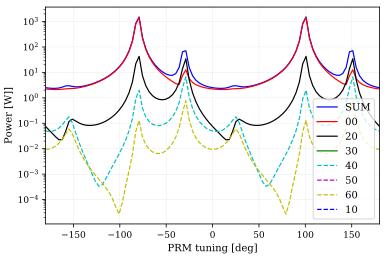

In [10]:
plt.semilogy(out.x, (out["all"])**2,label="SUM")
plt.semilogy(out.x, (out["CRPRC"])**2,label="00")
plt.semilogy(out.x, (out["ad2"])**2,label="20")
plt.semilogy(out.x, (out["ad3"])**2,label="30")
plt.semilogy(out.x, (out["ad4"])**2,'--',label="40")
plt.semilogy(out.x, (out["ad5"])**2,'--',label="50")
plt.semilogy(out.x, (out["ad6"])**2,'--',label="60")
plt.semilogy(out.x, (out["ad1"])**2,'--',label="10")
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Power [W]]")
plt.legend(loc=0)
plt.show

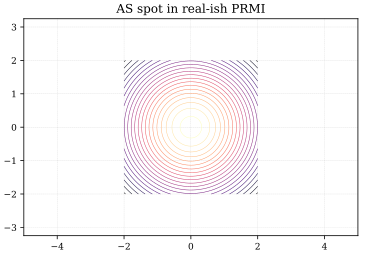

In [11]:
kat0.parse("""
beam AS n4
gauss input i1 nL 4.4088792e-3 7.3067531
xaxis AS x lin -2 2 300
x2axis AS y lin -2 2 300
maxtem 8
phase 2
""")

beamprof = kat0.run()

fig = plt.figure()
fig = plt.contour(beamprof.x, beamprof.y, beamprof["AS"], 25, linewidths=0.5)
plt.axis("equal")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('AS spot in real-ish PRMI')

plt.show()

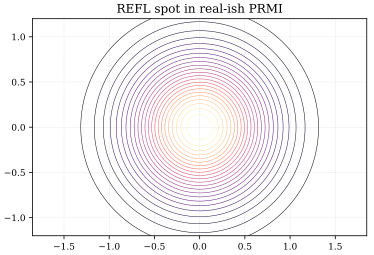

In [12]:
kat0.parse("""
beam REFL nREFL
gauss input i1 nL 4.4088792e-3 7.3067531
xaxis REFL x lin -2 2 300
x2axis REFL y lin -2 2 300
maxtem 8
phase 2
""")

beamprof = kat0.run()

fig = plt.figure()
fig = plt.contour(beamprof.x, beamprof.y, beamprof["REFL"], 25, linewidths=0.5)
plt.axis("equal")
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.title('REFL spot in real-ish PRMI')

plt.show()

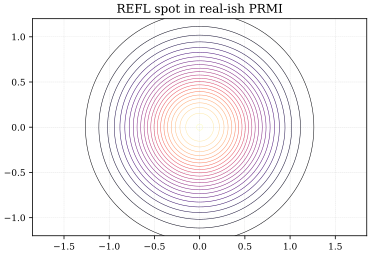

In [13]:
#### test ######
kat0.parse("""
m prm 0.90 0.10 90 nprb nf0
bs PR2 1 0 0 89 nf1 nf2 dump dump      # tilted+0.1%error
bs PR3 1 0 0 89 nf3 nf4 dump dump    # tilted-0.1%error
bs bs1 0.5 0.5 0 45 n1 n2 n3hr n4hr   #BS
m ITMx 0.996 4000e-6 90 n6hr dump
m ITMy 0.996 4000e-6 0 n5hr dump
attr ITMx Rc -1901.9 % off +0.1%
attr ITMy Rc -1901.9 % off +0.1%
attr ARx Rc 0
attr ARy Rc 0
attr prm Rc -458.5866  #-458.1285
attr PR2 Rc -3.0794764 #-3.0764
attr PR3 Rc 24.8915 #-0.1%

##### Original RoCs #####
#attr prm Rc -458.1285
#attr PR2 Rc -3.0764
#attr PR3 Rc 24.9165

ad CRPRC 0 0 0 nf0
ad ad1 1 0 0 nf0
ad ad2 2 0 0 nf0
ad ad3 0 3 0 nf0
ad ad4 4 0 0 nf0
ad ad5 5 0 0 nf0
ad ad6 6 0 0 nf0
ad all 0 nf0
beam REFL nREFL
gauss input i1 nL 4.4088792e-3 7.3067531
xaxis REFL x lin -2 2 300
x2axis REFL y lin -2 2 300
maxtem 8
phase 2
""")

beamprof = kat0.run()


fig = plt.figure()
fig = plt.contour(beamprof.x, beamprof.y, beamprof["REFL"], 25, linewidths=0.5)
plt.axis("equal")
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.title('REFL spot in real-ish PRMI')

plt.show()